In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

['AppleStore.csv', 'appleStore_description.csv']


ERROR:root:Line magic function `%matplotlib.inline` not found.


**appleStore.csv**

"id" : App ID

"track_name": App Name

"size_bytes": Size (in Bytes)

"currency": Currency Type

"price": Price amount

"rating_count_tot": User Rating counts (for all version)

"rating_count_ver": User Rating counts (for current version)

"user_rating" : Average User Rating value (for all version)

"user_rating_ver": Average User Rating value (for current version)

"ver" : Latest version code

"cont_rating": Content Rating

"prime_genre": Primary Genre

"sup_devices.num": Number of supporting devices

"ipadSc_urls.num": Number of screenshots showed for display

"lang.num": Number of supported languages

"vpp_lic": Vpp Device Based Licensing Enabled

In [2]:
data_df = pd.read_csv('../input/AppleStore.csv', index_col=0)

In [3]:
data_df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 955.9+ KB


In [5]:
data_df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


# 1. Distribution of paid app

In [6]:
paid_app = data_df[data_df['price']>0]

In [7]:
paid_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1
11,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1


To observe the distribution of one variable, if it is hard to draw the scatter, boxplot would be nice also.
Through the boxplot we will find that the price over 50$ would be a outlier. double check with ```value_counts()```

{'boxes': [<matplotlib.lines.Line2D at 0x7f1857a39048>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1857a39a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1857a44710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1857a442e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1857a39198>,
  <matplotlib.lines.Line2D at 0x7f1857a39630>]}

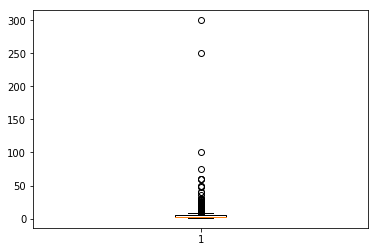

In [8]:
plt.boxplot(paid_app['price'])
# sns.countplot()

In [9]:
paid_app['price'].value_counts()

0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
11.99       6
13.99       6
29.99       6
12.99       5
15.99       4
17.99       3
59.99       3
16.99       2
27.99       2
20.99       2
22.99       2
39.99       2
23.99       2
49.99       2
74.99       1
99.99       1
47.99       1
21.99       1
18.99       1
34.99       1
249.99      1
299.99      1
Name: price, dtype: int64

In [10]:
processed_paid_df = paid_app[paid_app['price']<30]

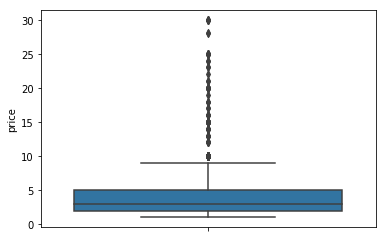

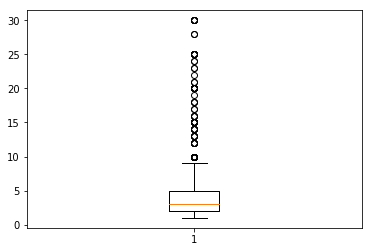

In [11]:
sns.boxplot(y=processed_paid_df['price'])
plt.show()
plt.boxplot(processed_paid_df['price'])
plt.show()

In [12]:
processed_paid_df['price'].describe()

count    3128.000000
mean        3.598376
std         3.352696
min         0.990000
25%         1.990000
50%         2.990000
75%         4.990000
max        29.990000
Name: price, dtype: float64

In [13]:
quantile_list = [0,0.25,0.5,0.75,1]
processed_paid_df['price'].quantile(quantile_list)

0.00     0.99
0.25     1.99
0.50     2.99
0.75     4.99
1.00    29.99
Name: price, dtype: float64

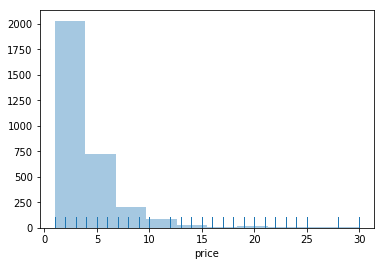

In [14]:
sns.distplot(processed_paid_df['price'], bins=10, kde=False, rug=True)
# kde=False 不显示密度函数曲线
# rug=True 小竖线

# 2. Category VS Price

In [15]:
processed_paid_df['prime_genre'].value_counts()

Games                1605
Education             317
Entertainment         201
Photo & Video         182
Utilities             139
Productivity          115
Health & Fitness      104
Music                  68
Lifestyle              50
Book                   46
Reference              43
Weather                41
Business               35
Sports                 35
Travel                 25
Navigation             25
Social Networking      24
Finance                20
Food & Drink           20
News                   17
Medical                14
Catalogs                1
Shopping                1
Name: prime_genre, dtype: int64

In [16]:
N = 10
top_cats = processed_paid_df['prime_genre'].value_counts()[:N].index.tolist()
top_apps_df = processed_paid_df[processed_paid_df['prime_genre'].isin(top_cats)]

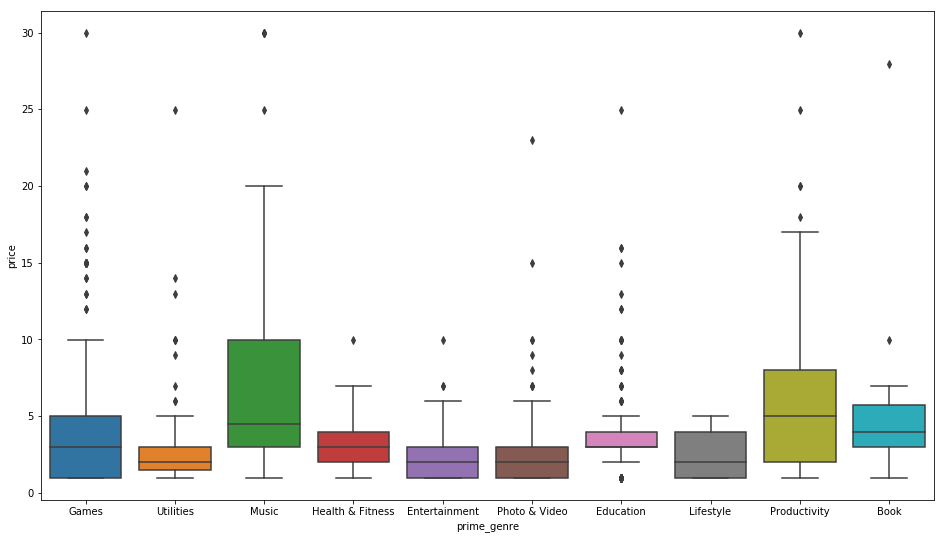

In [17]:
plt.figure(figsize=(16,9))
sns.boxplot(x=top_apps_df['prime_genre'],y=top_apps_df['price'])

meaningless scatter plot here which used very often once opon a time

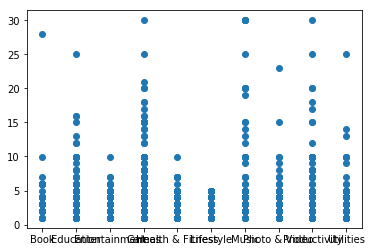

In [18]:
plt.scatter(x=top_apps_df['prime_genre'], y=top_apps_df['price'])

# 3. Free VS Paid Apps

In [19]:
data_df_new = data_df.copy()

In [20]:
N=10
top_cats = data_df['prime_genre'].value_counts()[:N].index.tolist()
print(top_cats)
other_cats_index = data_df[~data_df['prime_genre'].isin(top_cats)].index
print(other_cats_index.dtype)

['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities', 'Health & Fitness', 'Productivity', 'Social Networking', 'Lifestyle', 'Music']
int64


In [21]:
data_df_new.loc[other_cats_index, 'prime_genre'] = 'others'

In [22]:
data_df_new.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,others,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,others,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,others,37,5,45,1


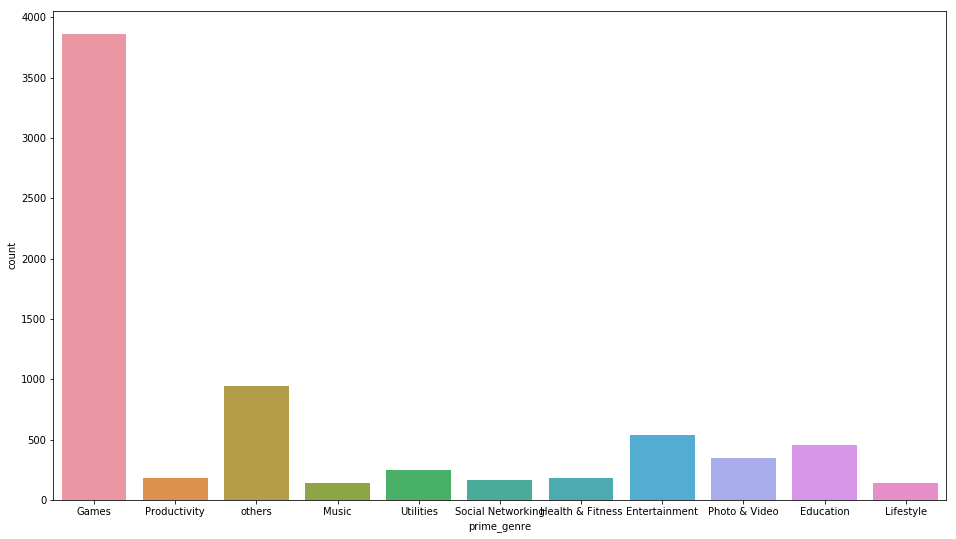

In [23]:
plt.figure(figsize=(16,9))
sns.countplot(data_df_new['prime_genre'])

In [24]:
data_df_new['type'] = np.where(data_df_new['price']==0, 'free', 'paid')

In [25]:
data_df_new.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,type
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,others,37,5,3,1,free
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,others,37,5,9,1,free
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,others,37,5,45,1,free


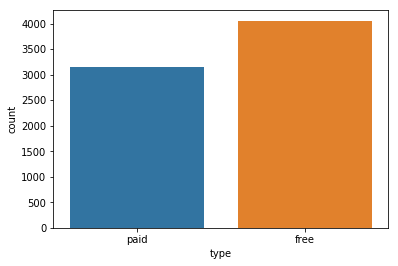

In [26]:
sns.countplot(data_df_new['type'])

In [27]:
free_paid_app_count = data_df_new.groupby(['prime_genre', 'type']).size().to_frame()
free_paid_app_count.columns = ['count']
free_paid_app_count

count
prime_genre       type       
Education         free    132
                  paid    321
Entertainment     free    334
                  paid    201
Games             free   2257
                  paid   1605
Health & Fitness  free     76
                  paid    104
Lifestyle         free     94
                  paid     50
Music             free     67
                  paid     71
Photo & Video     free    167
                  paid    182
Productivity      free     62
                  paid    116
Social Networking free    143
                  paid     24
Utilities         free    109
                  paid    139
others            free    615
                  paid    328

In [28]:
free_paid_app_pivot = pd.pivot_table(data_df_new, index=['prime_genre'], columns=['type'], 
                                     values=['id'], aggfunc='count')

In [29]:
free_paid_app_pivot

id      
type               free  paid
prime_genre                  
Education           132   321
Entertainment       334   201
Games              2257  1605
Health & Fitness     76   104
Lifestyle            94    50
Music                67    71
Photo & Video       167   182
Productivity         62   116
Social Networking   143    24
Utilities           109   139
others              615   328

In [30]:
free_paid_app_pivot.columns = free_paid_app_pivot.columns.droplevel()
free_paid_app_pivot

type,free,paid
prime_genre,,
Education,132,321
Entertainment,334,201
Games,2257,1605
Health & Fitness,76,104
Lifestyle,94,50
Music,67,71
Photo & Video,167,182
Productivity,62,116
Social Networking,143,24


if not droplevel of colums, hard to make percentage

In [31]:
free_paid_app_pivot['free_perc'] = 100 * free_paid_app_pivot['free'] / (free_paid_app_pivot['free']+free_paid_app_pivot['paid'])
free_paid_app_pivot['paid_perc'] = 100 * free_paid_app_pivot['paid'] / (free_paid_app_pivot['free']+free_paid_app_pivot['paid'])

In [32]:
free_paid_app_pivot

type,free,paid,free_perc,paid_perc
prime_genre,,,,
Education,132,321,29.139073,70.860927
Entertainment,334,201,62.429907,37.570093
Games,2257,1605,58.441222,41.558778
Health & Fitness,76,104,42.222222,57.777778
Lifestyle,94,50,65.277778,34.722222
Music,67,71,48.550725,51.449275
Photo & Video,167,182,47.851003,52.148997
Productivity,62,116,34.831461,65.168539
Social Networking,143,24,85.628743,14.371257


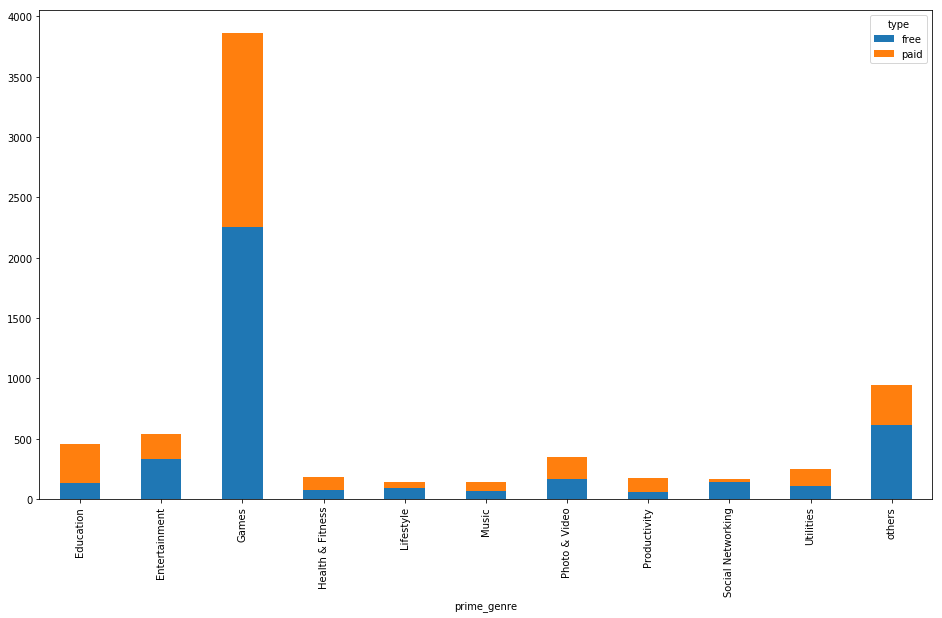

In [33]:
free_paid_app_pivot[['free','paid']].plot(kind='bar', stacked=True, figsize=(16,9))

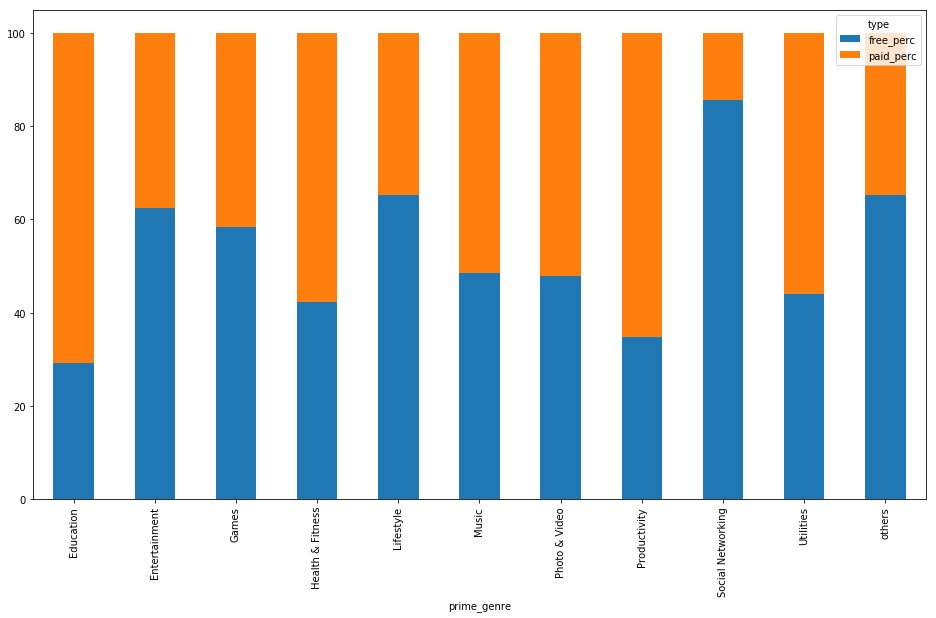

In [34]:
free_paid_app_pivot[['free_perc', 'paid_perc']].plot(kind='bar', stacked=True, figsize=(16,9))

# 4. Paid apps VS Rating

In [35]:
processed_paid_df['user_rating'].value_counts()

4.5    1192
4.0     771
3.5     327
0.0     255
5.0     237
3.0     167
2.5      77
2.0      49
1.5      30
1.0      23
Name: user_rating, dtype: int64

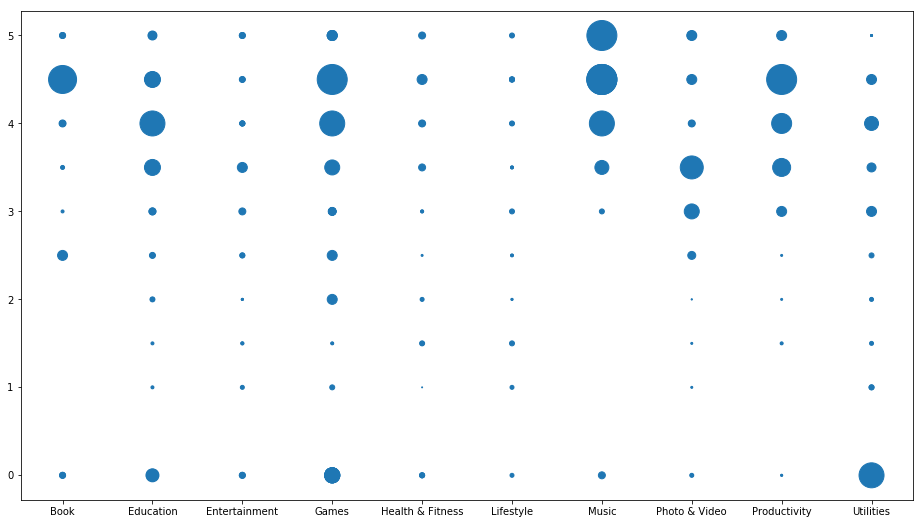

In [36]:
plt.figure(figsize=(16,9))
plt.scatter(top_apps_df['prime_genre'], top_apps_df['user_rating'], s=top_apps_df['price']**2)

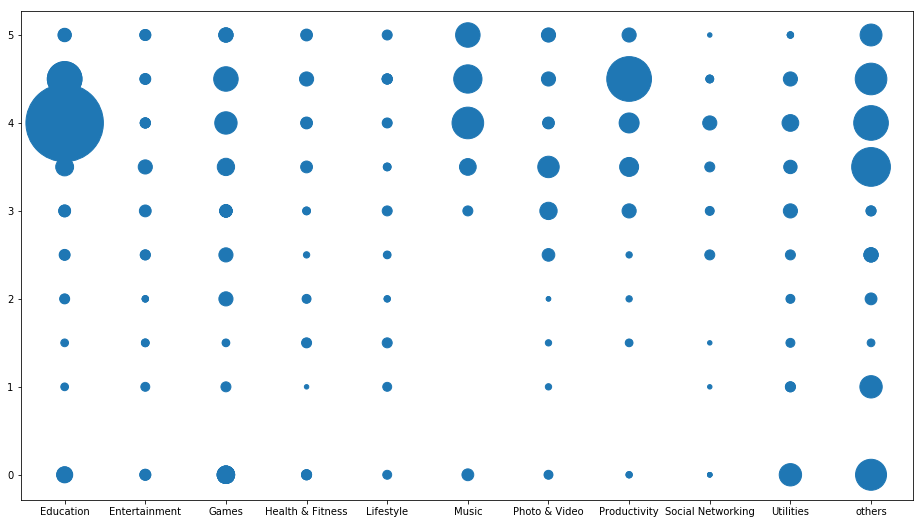

In [37]:
plt.figure(figsize=(16,9))
plt.scatter(data_df_new['prime_genre'], data_df_new['user_rating'], s=20*data_df_new['price'])

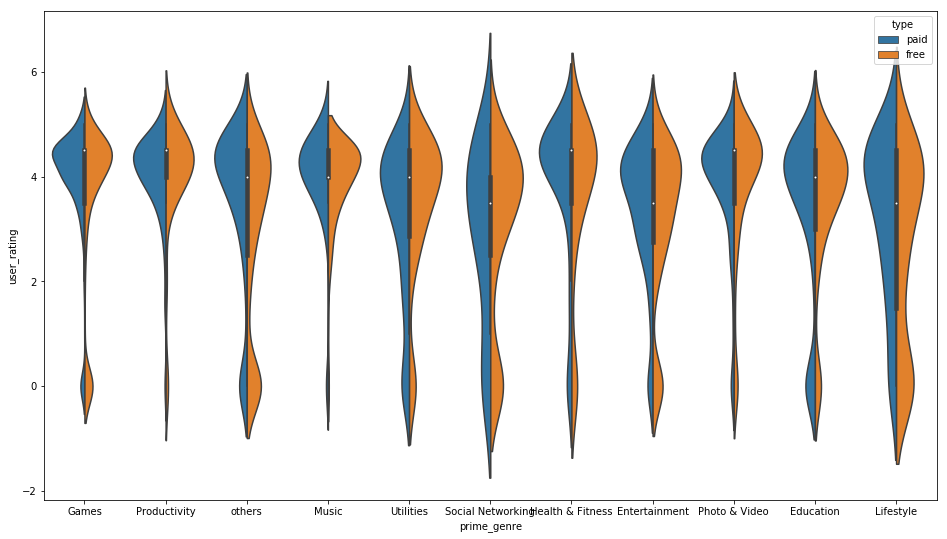

In [38]:
plt.figure(figsize=(16,9))
sns.violinplot(data=data_df_new, x='prime_genre', y='user_rating', hue='type', split=True)

# 5. Size VS Price

In [39]:
processed_paid_df['size_mb'] = processed_paid_df['size_bytes'] / 1000000

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


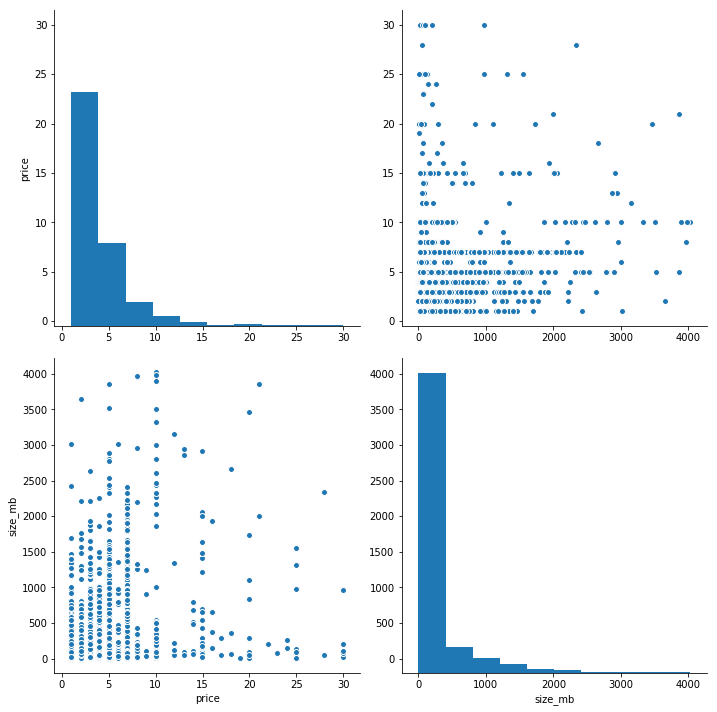

In [40]:
sns.pairplot(processed_paid_df[['price','size_mb']], size=5)